In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import pymongo

In [2]:
try:
    conn=pymongo.MongoClient()
    print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
    print ("Could not connect to MongoDB: {}s".format(e)) 
conn

Connected successfully!!!


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
vscode = conn.vscode
vs = vscode.Issues

In [4]:
vs.find_one().keys()

dict_keys(['_id', 'className', 'url', 'number', 'title', 'body', 'state', 'creator', 'created_at', 'reponame', 'organization', 'comments', 'subscribed', 'mentioned', 'labeled'])

In [5]:
user_dict = {}

for cursor in vs.find():
    unlabels = []
    issue_number = cursor["number"]
    date_created = cursor["created_at"]
    if "labeled" in cursor:
        labels = cursor["labeled"]
    if "unlabeled" in cursor:
        unlabels = cursor["unlabeled"]       
    date_closed = 0
    if "status" in cursor: 
        if cursor["status"][-1][0] == "closed":
            date_closed = cursor["status"][-1][1]
    if "assigned" in cursor:
        for user in cursor["assigned"]:
            user_number = user[0]
            date_assigned = user[1]
            date_unassigned = 0
            if "unassigned" in cursor:
                for unassigned_user in cursor["unassigned"]:
                    if unassigned_user[0] == user_number:
                        date_unassigned = unassigned_user[1]
            
            if user_number not in user_dict:
                user_dict[user_number] = {}
                user_dict[user_number][issue_number] = {"assigned":date_assigned, "unassigned": date_unassigned,
                                  "labels":labels, "date_closed": date_closed, "date_opened": date_created,
                                    "unlabeded": unlabels}
                
                
            else:
                user_dict[user_number][issue_number] = {"assigned":date_assigned, "unassigned": date_unassigned,
                                  "labels":labels, "date_closed": date_closed, "date_opened": date_created,
                                    "unlabeded": unlabels}                
                
            
                

In [6]:
user_dict["900690"]

{52688: {'assigned': '2018-06-22T13:30:14Z',
  'date_closed': 0,
  'date_opened': '2018-06-22T13:22:29Z',
  'labels': ['accessibility', 'workbench-notifications'],
  'unassigned': 0,
  'unlabeded': []},
 52687: {'assigned': '2018-06-22T13:35:32Z',
  'date_closed': 0,
  'date_opened': '2018-06-22T13:21:19Z',
  'labels': ['feature-request', 'workbench-history'],
  'unassigned': '2018-06-25T05:13:42Z',
  'unlabeded': []},
 52683: {'assigned': '2018-06-22T13:48:09Z',
  'date_closed': 0,
  'date_opened': '2018-06-22T13:02:39Z',
  'labels': ['accessibility', 'zoom'],
  'unassigned': 0,
  'unlabeded': []},
 52682: {'assigned': '2018-06-22T13:48:43Z',
  'date_closed': 0,
  'date_opened': '2018-06-22T12:40:45Z',
  'labels': ['extensions', 'accessibility', 'workbench-notifications'],
  'unassigned': 0,
  'unlabeded': ['extensions']},
 52676: {'assigned': '2018-06-22T14:11:42Z',
  'date_closed': 0,
  'date_opened': '2018-06-22T11:56:19Z',
  'labels': ['accessibility', 'workbench-notifications'],


In [48]:
user_dict.keys()

dict_keys(['12821956', '1898161', '1926584', '16890566', '22350', '10746682', '6461412', '323878', '900690', '9205389', '35271042', '5047891', '2193314', '1931590', '8586769', '25272315', '1794099', '876920', '3672607', '6561887', '19785531', '4033249', '173559', '4674940', '1051190', '172399', '12818376', '1487073', '1704059', '17869538', '15158320', '18324209', '18324331', '6344099', '5607882', '10201666', '79405', '8125011', '13241824', '7109548', '2239563', '2449568', '6909617', '762848', '7251102', '212305', '5591113', '11839736', '1948812', '12900364', '17735796', '223467', '242340', '6494226', '2146228', '856858'])

In [63]:
# create a list of the users with at least 150 issues assigned to them
issues_assigned = []
for user in user_dict.keys():
    print("total issues assigned to user {}: {}".format(user, len(user_dict[user])))
    if len(user_dict[user]) > 150:
        issues_assigned.append(len(user_dict[user]))

total issues assigned to user 12821956: 4637
total issues assigned to user 1898161: 2349
total issues assigned to user 1926584: 4813
total issues assigned to user 16890566: 1008
total issues assigned to user 22350: 5946
total issues assigned to user 10746682: 2790
total issues assigned to user 6461412: 4130
total issues assigned to user 323878: 2150
total issues assigned to user 900690: 8546
total issues assigned to user 9205389: 1169
total issues assigned to user 35271042: 65
total issues assigned to user 5047891: 5213
total issues assigned to user 2193314: 4293
total issues assigned to user 1931590: 2401
total issues assigned to user 8586769: 30
total issues assigned to user 25272315: 57
total issues assigned to user 1794099: 3985
total issues assigned to user 876920: 1874
total issues assigned to user 3672607: 200
total issues assigned to user 6561887: 67
total issues assigned to user 19785531: 105
total issues assigned to user 4033249: 172
total issues assigned to user 173559: 49
t

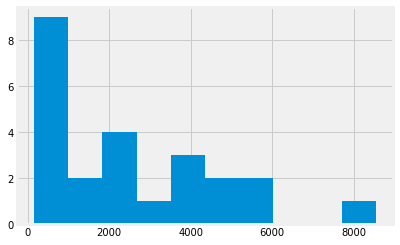

In [67]:
pd.Series(issues_assigned).hist()

In [273]:
user_list = []
for user in user_dict.keys():
    if len(user_dict[user]) > 150:
        user_list.append(user)


In [274]:
user_list

['12821956',
 '1898161',
 '1926584',
 '16890566',
 '22350',
 '10746682',
 '6461412',
 '323878',
 '900690',
 '9205389',
 '5047891',
 '2193314',
 '1931590',
 '1794099',
 '876920',
 '3672607',
 '4033249',
 '4674940',
 '172399',
 '1487073',
 '1704059',
 '2239563',
 '2449568',
 '11839736']

In [76]:
def duplicate_label(x):
    if x is np.nan:
        return 0
    elif "*duplicate" in x or "duplicate" in x:
        return 1
    else: return 0

In [348]:
def create_df(user):
    #     create dataframe
    df = pd.DataFrame.from_dict(user_dict[str(user)], orient='index')
    df.reset_index(inplace=True)
#     convert to datetime
    df["assigned_date"] = pd.to_datetime(df['assigned'])
    df["open_date"] = pd.to_datetime(df['date_opened'])
    df["close_date"] = pd.to_datetime(df['date_closed'])
    df["unassigned_date"] = pd.to_datetime(df['unassigned'])

    #     NEEDS TO BE CHANGED.......NOT WORKING CORRECTLY
    
    df["closed_by_user"] = df.apply(lambda row: 1 if row["unassigned"] == 0 else 
                                    (1 if row["close_date"] < row["unassigned_date"] else 0), axis=1 )
#     remove duplicate issues:
    df["duplicated"] = df["labels"].apply(duplicate_label)
    df = df[df["duplicated"] == 0]
    
#     Hours the issue was open and time the user was assigned
#     current date, date when the data was downloaded
    current_date = pd.to_datetime("2018-06-25")
    df["time_open"] = df.apply(lambda row: row["close_date"] - row["open_date"] if row["date_closed"] != 0 
                           else current_date - row["open_date"], axis=1)
    df["hours_open"] = df["time_open"].apply(lambda x: x.total_seconds()/3600)
    
#     df["time_assigned"] = df.apply(lambda row: row["close_date"] - row["assigned_date"] if row["date_closed"] != 0 
#                            else current_date - row["assigned_date"], axis=1)
#     df["hours_assigned"] = df["time_assigned"].apply(lambda x: x.total_seconds()/3600)
    
    return df

In [349]:
def labels_list(user, dataframe):
    
    labels = [label for label_list in dataframe["labels"].values for label in label_list]
    top_labels = pd.Series(labels).value_counts()
    
    for i in range(5):
        print(" {}- {}: {} times".format(i+1, top_labels.index[i], top_labels[i]))
    
    return labels
    

In [350]:
def user_information(user):
    
    df = create_df(user)
    
    print("Total issues assigned to user {}: {}".format(user, df.shape[0]))
    print("% issues solved by the user {}: {:.0f}%".format(user, sum(df["closed_by_user"] == 1)/df.shape[0]*100))
    
    print("number of open issues assigned to user {}: {}".format(user, sum(df["date_closed"] == 0)))
    print("this user solved an average of {:.2f} issues per day".format(sum(df["date_closed"] != 0)/
                                                                    (pd.Timestamp.now() - min(df["assigned_date"])).days))
    print("if he keeps the same average it will take him {:.2f} days to solve all his open issues"\
         .format(sum(df["date_closed"] == 0)/(sum(df["date_closed"] != 0)/(pd.Timestamp.now() - min(df["assigned_date"])).days)))
    
    
    print("most recent closed issue was in the date {}, {} days ago.".format(max(df.close_date),
                                                                             (pd.Timestamp.now() - max(df.close_date)).days))
    print()
    print("Top 5 most common labels from issues assigned to this user:")
    labels = labels_list(user, df)
    top_labels = pd.Series(labels).value_counts()
    
    for label in top_labels.index[:10]:
        label_info(label, df)

    print()
    print("Top 5 most common labels from open issues assigned to this user:")
    open_labels = labels_list(user, df[df["date_closed"] == 0])
    top_labels = pd.Series(open_labels).value_counts()


In [359]:
def label_info(label, dataframe):
    
    dataframe[label] = dataframe["labels"].apply(lambda x: 1 if label in x else 0)
    df = dataframe[dataframe[label] == 1]
    
    df_open = df[df["date_closed"] == 0]
    
    print("Total issues assigned with the label {}: {}".format(label, df.shape[0]))
    print("corresponds to % of total issues assigned: {:.2f}%".format(df.shape[0]/dataframe.shape[0]*100))
    print("Average hours open: {:.0f}".format(df.hours_open.mean()))
    print("% of the issues wit this label solved by the user: {:.2f}%".format(sum(df["closed_by_user"] == 1) / df.shape[0]*100, label))
    print()
    print("issues with this label still open: {}".format(df_open.shape[0]))
    print()
    print()

In [360]:
user_information("900690")

Total issues assigned to user 900690: 7162
% issues solved by the user 900690: 73%
number of open issues assigned to user 900690: 947
this user solved an average of 6.42 issues per day
if he keeps the same average it will take him 147.50 days to solve all his open issues
most recent closed issue was in the date 2018-06-25 07:15:21, 14 days ago.

Top 5 most common labels from issues assigned to this user:
 1- bug: 2383 times
 2- workbench: 2083 times
 3- verified: 2071 times
 4- needs more info: 1977 times
 5- feature-request: 1634 times
Total issues assigned with the label bug: 2318
corresponds to % of total issues assigned: 32.37%
Average hours open: 1890
% of the issues wit this label solved by the user: 75.71%

issues with this label still open: 217


Total issues assigned with the label workbench: 2059
corresponds to % of total issues assigned: 28.75%
Average hours open: 3983
% of the issues wit this label solved by the user: 64.74%

issues with this label still open: 410


Total i

In [370]:
df = create_df("900690")

In [378]:
df[(df["unassigned"] != 0) & (df["date_closed"] != 0)]

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,time_open,hours_open
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[],2015-11-13 16:48:18,2015-11-13 16:48:18,2015-11-14 05:42:28,2015-12-15 14:37:18,1,0,0 days 12:54:10,12.902778
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron],2015-11-14 12:53:12,2015-11-14 12:53:12,2015-11-19 10:26:08,2015-12-15 14:37:12,1,0,4 days 21:32:56,117.548889
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker],2015-11-16 09:39:42,2015-11-15 12:05:39,2015-11-19 08:11:29,2015-12-15 14:37:06,1,0,3 days 20:05:50,92.097222
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-16 09:39:13,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-18 16:28:16,0,0,3 days 01:27:21,73.455833
7,28,2015-11-16T10:30:55Z,2015-12-15T14:37:00Z,"[Bug, Blocker, verified]",2015-11-16T11:07:24Z,2015-11-16T10:30:14Z,[],2015-11-16 10:30:55,2015-11-16 10:30:14,2015-11-16 11:07:24,2015-12-15 14:37:00,1,0,0 days 00:37:10,0.619444
8,37,2015-11-17T14:50:06Z,2015-12-15T14:36:51Z,"[Bug, verified]",2015-11-19T12:45:33Z,2015-11-17T14:50:06Z,[],2015-11-17 14:50:06,2015-11-17 14:50:06,2015-11-19 12:45:33,2015-12-15 14:36:51,1,0,1 days 21:55:27,45.924167
9,48,2018-03-09T06:34:54Z,2016-08-17T11:42:47Z,"[Feature Request, workbench, os-integration, o...",2018-03-09T06:34:43Z,2015-11-18T16:10:36Z,[workbench],2018-03-09 06:34:54,2015-11-18 16:10:36,2018-03-09 06:34:43,2016-08-17 11:42:47,0,0,841 days 14:24:07,20198.401944
10,53,2015-12-18T15:05:58Z,2015-11-23T16:30:54Z,"[Feature Request, verified]",2015-12-18T15:06:06Z,2015-11-18T16:23:12Z,[],2015-12-18 15:05:58,2015-11-18 16:23:12,2015-12-18 15:06:06,2015-11-23 16:30:54,0,0,29 days 22:42:54,718.715000
11,55,2015-11-18T17:34:36Z,2016-08-10T06:15:53Z,"[bug, search]",2018-04-30T04:54:40Z,2015-11-18T16:28:12Z,[bug],2015-11-18 17:34:36,2015-11-18 16:28:12,2018-04-30 04:54:40,2016-08-10 06:15:53,0,0,893 days 12:26:28,21444.441111
13,58,2015-11-18T17:34:44Z,2015-11-23T16:30:54Z,"[Feature Request, api]",2016-04-04T16:14:05Z,2015-11-18T16:44:24Z,[],2015-11-18 17:34:44,2015-11-18 16:44:24,2016-04-04 16:14:05,2015-11-23 16:30:54,0,0,137 days 23:29:41,3311.494722


In [374]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,time_open,hours_open
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[],2015-11-13 16:48:18,2015-11-13 16:48:18,2015-11-14 05:42:28,2015-12-15 14:37:18,1,0,0 days 12:54:10,12.902778
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron],2015-11-14 12:53:12,2015-11-14 12:53:12,2015-11-19 10:26:08,2015-12-15 14:37:12,1,0,4 days 21:32:56,117.548889
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker],2015-11-16 09:39:42,2015-11-15 12:05:39,2015-11-19 08:11:29,2015-12-15 14:37:06,1,0,3 days 20:05:50,92.097222
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-16 09:39:13,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-18 16:28:16,0,0,3 days 01:27:21,73.455833
4,12,2015-12-15T14:21:11Z,0,"[Bug, languages basic, verified]",2015-12-09T10:10:21Z,2015-11-16T07:02:43Z,[],2015-12-15 14:21:11,2015-11-16 07:02:43,2015-12-09 10:10:21,1970-01-01 00:00:00,1,0,23 days 03:07:38,555.127222


In [297]:
df["bug"] = df["labels"].apply(lambda x: 1 if "bug" in x else 0)

In [298]:
df2 = df[df["bug"] == 1]

In [300]:
df2.hours_open.mean()

1841.050541310542

In [303]:
sum(df["closed_by_user"] == 1) / df.shape[0]*100

83.80423814328961

In [296]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,time_open,hours_open
0,10,2015-11-15T18:54:49Z,2015-12-15T10:55:36Z,"[Bug, verified]",2015-11-16T12:58:13Z,2015-11-15T18:54:49Z,[],2015-11-15 18:54:49,2015-11-15 18:54:49,2015-11-16 12:58:13,2015-12-15 10:55:36,1,0,0 days 18:03:24,18.056667
1,11,2015-11-18T16:28:16Z,2015-11-16T09:39:13Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-18 16:28:16,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-16 09:39:13,0,0,3 days 01:27:21,73.455833
2,18,2015-12-15T14:20:06Z,0,"[Bug, verified]",2015-11-16T11:29:30Z,2015-11-16T08:45:27Z,[],2015-12-15 14:20:06,2015-11-16 08:45:27,2015-11-16 11:29:30,1970-01-01 00:00:00,1,0,0 days 02:44:03,2.734167
3,22,2015-11-16T09:32:02Z,0,[verified],2015-11-26T09:07:48Z,2015-11-16T09:32:02Z,[],2015-11-16 09:32:02,2015-11-16 09:32:02,2015-11-26 09:07:48,1970-01-01 00:00:00,1,0,9 days 23:35:46,239.596111
4,31,2015-11-16T14:32:24Z,0,"[Bug, verified]",2016-07-05T14:07:36Z,2015-11-16T14:32:17Z,[],2015-11-16 14:32:24,2015-11-16 14:32:17,2016-07-05 14:07:36,1970-01-01 00:00:00,1,0,231 days 23:35:19,5567.588611


In [272]:
issues_assigned

[4637,
 2349,
 4813,
 1008,
 5946,
 2790,
 4130,
 2150,
 8546,
 1169,
 5213,
 4293,
 2401,
 3985,
 1874,
 200,
 172,
 463,
 651,
 341,
 245,
 162,
 579,
 343]

In [295]:
df = create_df("22350")

In [276]:
df["needs_info"] = df["labels"].apply(lambda x: 1 if "needs more info" in x else 0)

In [277]:

current_date = pd.to_datetime("2018-06-25")

In [278]:
df["time_open"] = df.apply(lambda row: row["close_date"] - row["open_date"] if row["date_closed"] != 0 
                           else current_date - row["open_date"], axis=1)
df["hours_open"] = df["time_open"].apply(lambda x: x.total_seconds()/3600)

In [279]:
# df["time_assigned"] = df.apply(lambda row: row["close_date"] - row["assigned_date"] if row["date_closed"] != 0 
#                            else current_date - row["assigned_date"], axis=1)
# df["hours_assigned"] = df["time_assigned"].apply(lambda x: x.total_seconds()/3600)

In [280]:
df[["hours_open", "closed_by_user", "hours_assigned"]].groupby("closed_by_user").mean()

,hours_open,hours_assigned
closed_by_user,,
0,1839.192424,1531.683782
1,1413.884712,1309.066480


In [262]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,bug,time_open,hours_open,time_assigned
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[],2015-11-13 16:48:18,2015-11-13 16:48:18,2015-11-14 05:42:28,2015-12-15 14:37:18,1,0,1,0 days 12:54:10,12.902778,0 days 12:54:10
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron],2015-11-14 12:53:12,2015-11-14 12:53:12,2015-11-19 10:26:08,2015-12-15 14:37:12,1,0,0,4 days 21:32:56,117.548889,4 days 21:32:56
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker],2015-11-16 09:39:42,2015-11-15 12:05:39,2015-11-19 08:11:29,2015-12-15 14:37:06,1,0,0,3 days 20:05:50,70.529722,2 days 22:31:47
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-16 09:39:13,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-18 16:28:16,0,0,0,3 days 01:27:21,70.529167,2 days 22:31:45
4,12,2015-12-15T14:21:11Z,0,"[Bug, languages basic, verified]",2015-12-09T10:10:21Z,2015-11-16T07:02:43Z,[],2015-12-15 14:21:11,2015-11-16 07:02:43,2015-12-09 10:10:21,1970-01-01 00:00:00,1,0,0,23 days 03:07:38,-148.180556,-7 days +19:49:10


# Create a dataframe for a user:

In [393]:
df = pd.DataFrame.from_dict(user_dict["900690"], orient='index')

In [394]:
df.reset_index(inplace=True)

In [395]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[]
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron]
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker]
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[]
4,12,2015-12-15T14:21:11Z,0,"[Bug, languages basic, verified]",2015-12-09T10:10:21Z,2015-11-16T07:02:43Z,[]


In [403]:
df["assigned_date"] = pd.to_datetime(df['assigned'])
df["open_date"] = pd.to_datetime(df['date_opened'])
df["close_date"] = pd.to_datetime(df['date_closed'])
df["unassigned_date"] = pd.to_datetime(df['unassigned'])

## If the unassigned date is before the close date the issue was not solved by this user, create a binary column, closed by this user or not:

In [401]:
df_closed = df[df["date_closed"] != 0]

In [407]:
df_closed["closed_by_user"] = df.apply(lambda row: 1 if row["unassigned"] == 0 else 
                                    (1 if row["close_date"] < row["unassigned_date"] else 0), axis=1 )

/home/alberto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [405]:
df_closed = df[df["date_closed"] != 0]

In [400]:
df.shape

(7162, 8)

In [408]:
df_closed["closed_by_user"].value_counts()

1    4311
0    1904
Name: closed_by_user, dtype: int64

In [409]:
df_closed.shape

(6215, 13)

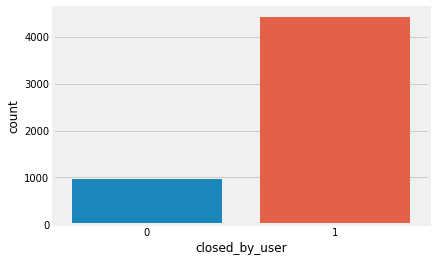

In [367]:
sns.countplot(df_closed["closed_by_user"]);

## merge with the original dataset:

In [16]:
df = df.set_index("index").join(df_closed[["index", "closed_by_user"]].set_index("index"), how="left")

## remove duplicate labels:

In [398]:
df["duplicated"] = df["labels"].apply(duplicate_label)

In [399]:
df = df[df["duplicated"] == 0]

this user closed 60.19% of the issues assigned to him


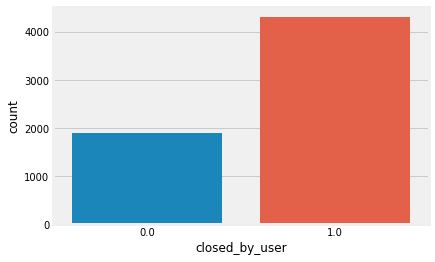

In [20]:
sns.countplot(df["closed_by_user"]);
print("this user closed {:.4}% of the issues assigned to him".format(df["closed_by_user"].value_counts()[1]/df.shape[0]*100))

In [21]:
df.reset_index(inplace=True)

In [22]:
def open_issues_at_date(date):
#     total closed issues, closed date inferior to date and superior to 2010(for the open issues)
    closed_issues = ((df["close_date"] < date) & (df["close_date"] > pd.to_datetime("2010"))).sum()
#     open issues that the user was unassigned from
    open_unassigned = ((df["date_closed"] == 0) & (df["unassigned_date"] < date) & (df["unassigned_date"]> pd.to_datetime("2010"))).sum()
#     total open issues assigned to the user
    total_open = (df["assigned_date"] < date).sum()
    
    return total_open - closed_issues - open_unassigned

In [23]:
df["open_issues_when_assigned"] = df["assigned_date"].apply(open_issues_at_date)

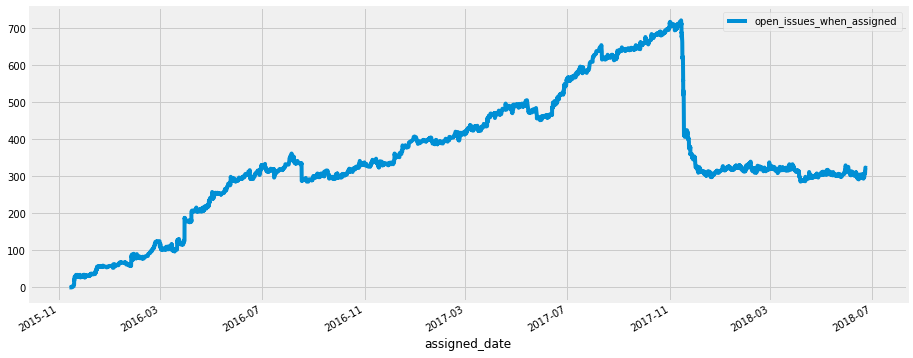

In [24]:
df[["assigned_date", "open_issues_when_assigned"]].set_index("assigned_date").plot(figsize=(14,6));

In [25]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,open_issues_when_assigned
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[],2015-11-13 16:48:18,2015-11-13 16:48:18,2015-11-14 05:42:28,2015-12-15 14:37:18,1.0,0,0
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron],2015-11-14 12:53:12,2015-11-14 12:53:12,2015-11-19 10:26:08,2015-12-15 14:37:12,1.0,0,0
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker],2015-11-16 09:39:42,2015-11-15 12:05:39,2015-11-19 08:11:29,2015-12-15 14:37:06,1.0,0,1
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-16 09:39:13,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-18 16:28:16,0.0,0,0
4,12,2015-12-15T14:21:11Z,0,"[Bug, languages basic, verified]",2015-12-09T10:10:21Z,2015-11-16T07:02:43Z,[],2015-12-15 14:21:11,2015-11-16 07:02:43,2015-12-09 10:10:21,1970-01-01 00:00:00,1.0,0,48


In [26]:
# aproximately the data it was scraped, to calculate how many hours the issues are open
current_date = pd.to_datetime("2018-06-25")

In [27]:
df["time_open"] = df.apply(lambda row: row["close_date"] - row["open_date"] if row["date_closed"] != 0 
                           else current_date - row["open_date"], axis=1)
df["hours_open"] = df["time_open"].apply(lambda x: x.total_seconds()/3600)

In [28]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,open_issues_when_assigned,time_open,hours_open
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[],2015-11-13 16:48:18,2015-11-13 16:48:18,2015-11-14 05:42:28,2015-12-15 14:37:18,1.0,0,0,0 days 12:54:10,12.902778
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron],2015-11-14 12:53:12,2015-11-14 12:53:12,2015-11-19 10:26:08,2015-12-15 14:37:12,1.0,0,0,4 days 21:32:56,117.548889
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker],2015-11-16 09:39:42,2015-11-15 12:05:39,2015-11-19 08:11:29,2015-12-15 14:37:06,1.0,0,1,3 days 20:05:50,92.097222
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-16 09:39:13,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-18 16:28:16,0.0,0,0,3 days 01:27:21,73.455833
4,12,2015-12-15T14:21:11Z,0,"[Bug, languages basic, verified]",2015-12-09T10:10:21Z,2015-11-16T07:02:43Z,[],2015-12-15 14:21:11,2015-11-16 07:02:43,2015-12-09 10:10:21,1970-01-01 00:00:00,1.0,0,48,23 days 03:07:38,555.127222


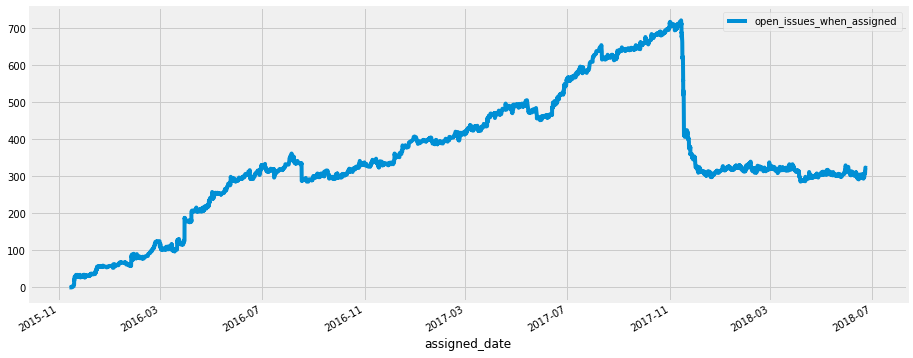

In [29]:
df[["assigned_date", "open_issues_when_assigned"]].set_index("assigned_date").plot(figsize=(14,6));

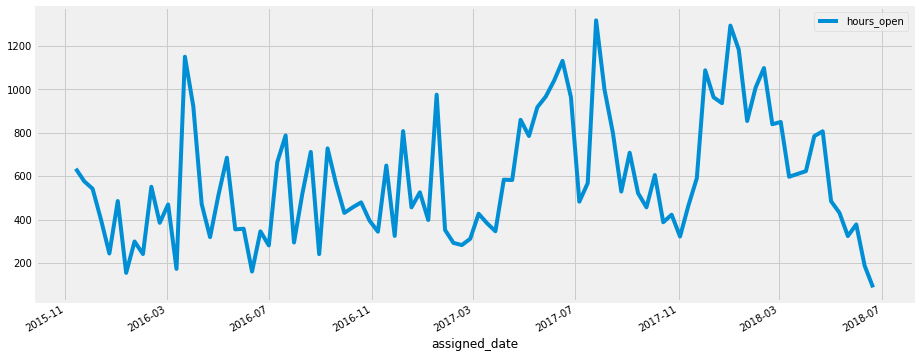

In [30]:
# average time the issues that were assigned to the user those days were open
df[df["hours_open"] < 5000][["assigned_date", "hours_open"]].set_index("assigned_date")\
                            .groupby(pd.Grouper(freq='10D')).mean().plot(figsize=(14,6))

In [31]:
df[(df["unassigned"] == 0) & (df["date_closed"] == 0)]

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,open_issues_when_assigned,time_open,hours_open
312,1569,2015-12-22T10:55:41Z,0,"[bug, upstream, accessibility, electron, workb...",0,2015-12-22T09:03:45Z,"[bug, workbench]",2015-12-22 10:55:41,2015-12-22 09:03:45,1970-01-01,1970-01-01,NaN,0,57,915 days 14:56:15,21974.937500
440,2259,2016-01-26T10:48:31Z,0,"[bug, upstream, electron-update, electron, wor...",0,2016-01-25T23:02:54Z,"[electron-update, bug, workbench, electron]",2016-01-26 10:48:31,2016-01-25 23:02:54,1970-01-01,1970-01-01,NaN,0,62,881 days 00:57:06,21144.951667
606,2945,2016-02-12T08:43:46Z,0,"[upstream, bug, electron, workbench, accessibi...",0,2016-02-11T18:38:37Z,"[bug, workbench]",2016-02-12 08:43:46,2016-02-11 18:38:37,1970-01-01,1970-01-01,NaN,0,84,864 days 05:21:23,20741.356389
769,3998,2016-03-11T08:34:05Z,0,"[bug, perf, explorer-files, file-watcher, upst...",0,2016-03-11T08:34:05Z,[file-explorer],2016-03-11 08:34:05,2016-03-11 08:34:05,1970-01-01,1970-01-01,NaN,0,106,835 days 15:25:55,20055.431944
902,4586,2016-03-23T05:50:15Z,0,"[bug, upstream, explorer-files, bug, verificat...",0,2016-03-22T21:14:31Z,"[bug, verification-found, file-explorer]",2016-03-23 05:50:15,2016-03-22 21:14:31,1970-01-01,1970-01-01,NaN,0,126,824 days 02:45:29,19778.758056
934,4727,2016-03-30T07:25:06Z,0,"[bug, needs more info, upstream, bug, explorer...",0,2016-03-29T02:51:42Z,"[bug, needs more info, bug, file-explorer]",2016-03-30 07:25:06,2016-03-29 02:51:42,1970-01-01,1970-01-01,NaN,0,187,817 days 21:08:18,19629.138333
942,4771,2016-04-08T02:10:29Z,0,"[v-test, bug, i18n, upstream, workbench, elect...",0,2016-03-29T20:22:51Z,"[v-test, bug, workbench]",2016-04-08 02:10:29,2016-03-29 20:22:51,1970-01-01,1970-01-01,NaN,0,206,817 days 03:37:09,19611.619167
1040,5217,2016-04-13T10:18:57Z,0,"[bug, upstream, workbench, electron, menu, fon...",0,2016-04-13T07:36:54Z,"[bug, workbench, needs more info]",2016-04-13 10:18:57,2016-04-13 07:36:54,1970-01-01,1970-01-01,NaN,0,211,802 days 16:23:06,19264.385000
1107,5556,2016-04-20T17:15:10Z,0,"[bug, upstream, workbench, accessibility, menu...",0,2016-04-20T16:24:48Z,"[bug, workbench]",2016-04-20 17:15:10,2016-04-20 16:24:48,1970-01-01,1970-01-01,NaN,0,211,795 days 07:35:12,19087.586667
1243,6140,2016-05-06T06:12:23Z,0,"[accessibility, v-test, upstream, bug, workben...",0,2016-05-05T20:06:53Z,"[v-test, workbench, bug, workbench]",2016-05-06 06:12:23,2016-05-05 20:06:53,1970-01-01,1970-01-01,NaN,0,254,780 days 03:53:07,18723.885278


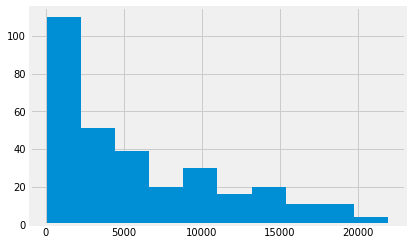

In [32]:
df[(df["unassigned"] == 0) & (df["date_closed"] == 0)]["hours_open"].hist()

In [33]:
df.head()

,index,assigned,unassigned,labels,date_closed,date_opened,unlabeded,assigned_date,open_date,close_date,unassigned_date,closed_by_user,duplicated,open_issues_when_assigned,time_open,hours_open
0,5,2015-11-13T16:48:18Z,2015-12-15T14:37:18Z,"[bug, verified]",2015-11-14T05:42:28Z,2015-11-13T16:48:18Z,[],2015-11-13 16:48:18,2015-11-13 16:48:18,2015-11-14 05:42:28,2015-12-15 14:37:18,1.0,0,0,0 days 12:54:10,12.902778
1,8,2015-11-14T12:53:12Z,2015-12-15T14:37:12Z,"[Bug, Electron, verified]",2015-11-19T10:26:08Z,2015-11-14T12:53:12Z,[Electron],2015-11-14 12:53:12,2015-11-14 12:53:12,2015-11-19 10:26:08,2015-12-15 14:37:12,1.0,0,0,4 days 21:32:56,117.548889
2,9,2015-11-16T09:39:42Z,2015-12-15T14:37:06Z,"[Bug, Blocker, verified]",2015-11-19T08:11:29Z,2015-11-15T12:05:39Z,[Blocker],2015-11-16 09:39:42,2015-11-15 12:05:39,2015-11-19 08:11:29,2015-12-15 14:37:06,1.0,0,1,3 days 20:05:50,92.097222
3,11,2015-11-16T09:39:13Z,2015-11-18T16:28:16Z,[cla-not-required],2015-11-19T08:10:58Z,2015-11-16T06:43:37Z,[],2015-11-16 09:39:13,2015-11-16 06:43:37,2015-11-19 08:10:58,2015-11-18 16:28:16,0.0,0,0,3 days 01:27:21,73.455833
4,12,2015-12-15T14:21:11Z,0,"[Bug, languages basic, verified]",2015-12-09T10:10:21Z,2015-11-16T07:02:43Z,[],2015-12-15 14:21:11,2015-11-16 07:02:43,2015-12-09 10:10:21,1970-01-01 00:00:00,1.0,0,48,23 days 03:07:38,555.127222


In [46]:
df.keys()

Index(['index', 'assigned', 'unassigned', 'labels', 'date_closed',
       'date_opened', 'unlabeded', 'assigned_date', 'open_date', 'close_date',
       'unassigned_date', 'closed_by_user', 'duplicated',
       'open_issues_when_assigned', 'time_open', 'hours_open'],
      dtype='object')

In [34]:
df["labels"].values

array([list(['bug', 'verified']), list(['Bug', 'Electron', 'verified']),
       list(['Bug', 'Blocker', 'verified']), ...,
       list(['accessibility', 'zoom']),
       list(['feature-request', 'workbench-history']),
       list(['accessibility', 'workbench-notifications'])], dtype=object)

In [35]:
labels = [label for label_list in df["labels"].values for label in label_list]

In [36]:
print("number of labels:", len(labels))
print("number of unique labels:", len(set(labels)))

number of labels: 20472
number of unique labels: 224


In [37]:
pd.Series(labels).value_counts()[:30]

bug                    2383
workbench              2083
verified               2071
needs more info        1977
feature-request        1634
upstream                592
new release             468
important               324
freeze-slow-crash       305
electron                291
help wanted             282
verification-needed     258
explorer-files          251
editor                  236
debt                    211
question                209
ux                      209
as-designed             203
cla-not-required        191
insiders                187
multi-root              178
accessibility           177
workbench-tabs          177
api                     173
themes                  164
debug                   144
tabs                    137
cla-already-signed      136
files                   136
workbench-editors       134
dtype: int64

In [38]:
unlabels = [label for label_list in df["unlabeded"].values for label in label_list]

In [39]:
print("number of unlabels:", len(unlabels))
print("number of unique unlabels:", len(set(unlabels)))

number of unlabels: 4305
number of unique unlabels: 143


In [40]:
df.columns

Index(['index', 'assigned', 'unassigned', 'labels', 'date_closed',
       'date_opened', 'unlabeded', 'assigned_date', 'open_date', 'close_date',
       'unassigned_date', 'closed_by_user', 'duplicated',
       'open_issues_when_assigned', 'time_open', 'hours_open'],
      dtype='object')

In [41]:
pd.Series(unlabels).value_counts()[:20]

workbench              1025
needs more info         641
bug                     501
new release             296
help wanted             161
feature-request         140
editor                   98
upstream                 82
verified                 78
file-explorer            76
insiders                 69
important                58
integrated-terminal      53
workbench-tabs           51
editor-core              47
verification-needed      44
cla-required             40
extensions               39
verification-found       34
under-discussion         33
dtype: int64

In [42]:
df.

SyntaxError: invalid syntax (<ipython-input-42-38e9e33c87a8>, line 1)